In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import boxcox
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kstest
from scipy.stats import ks_2samp
from scipy.stats import ttest_ind
from scipy.stats import f
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import anderson

In [145]:
df=pd.read_excel("C:\\Users\\HP\\Downloads\\loan.xlsx")

In [146]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [147]:
df11=df.copy()

<Axes: xlabel='Gender'>

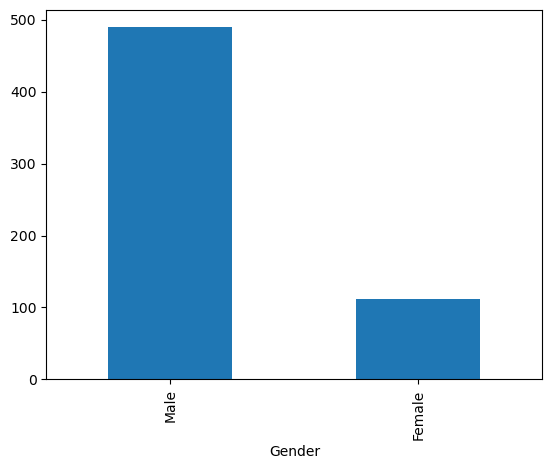

In [148]:
df['Gender'].value_counts().plot(kind='bar')

In [149]:
df.drop(columns=['Loan_ID'],inplace=True)

In [150]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [151]:
def fun(x):
    if 'Male' == x:
        return 1
    elif 'Female' == x:
        return 0

In [152]:
df['Gender']=df['Gender'].apply(fun)

<Axes: xlabel='Married'>

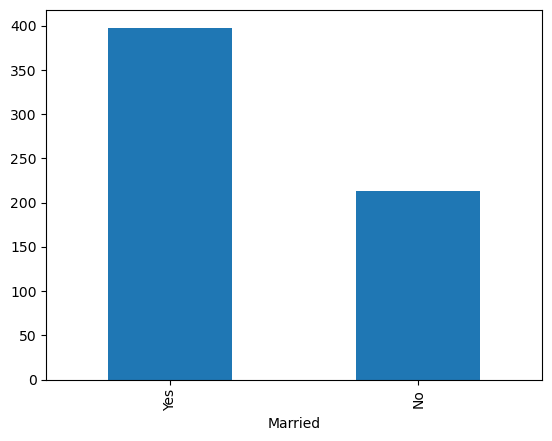

In [153]:
df['Married'].value_counts().plot(kind='bar')

In [154]:
def fun(x):
    if 'No' == x:
        return 0
    else:
        return 1

In [155]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [156]:
df['Married']=df['Married'].apply(fun)

In [157]:
df['Married'].unique()

array([0, 1])

In [158]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [159]:
df['Dependents'].unique()

array([0, 1, 2, '3+', nan], dtype=object)

In [160]:
df.isnull().sum()

Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [161]:
df['Dependents']=df['Dependents'].replace('3+','3')

In [162]:
df['Dependents'].unique()

array([0, 1, 2, '3', nan], dtype=object)

In [163]:
df['Dependents']=df['Dependents'].fillna(0)

In [164]:
df['Dependents'].unique()

array([0, 1, 2, '3'], dtype=object)

In [165]:
df['Education']=df['Education'].apply(lambda x:1 if x=='Graduate' else 0)

In [166]:
df['Education'].unique()

array([1, 0])

In [167]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [168]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [169]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [170]:
df['Self_Employed']=df['Self_Employed'].fillna('No')

<Axes: xlabel='Self_Employed'>

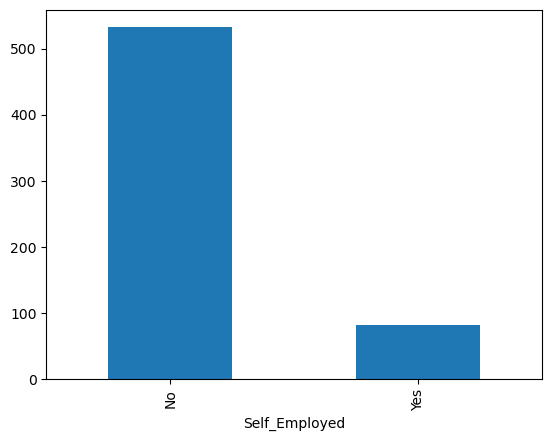

In [171]:
df['Self_Employed'].value_counts().plot(kind='bar')

In [172]:
df['Self_Employed']=df['Self_Employed'].apply(lambda x: 1 if x=='Yes' else 0)

In [173]:
df['Self_Employed'].unique()

array([0, 1])

In [174]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [175]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

C:\Users\HP\AppData\Local\Temp\ipykernel_14880\2349853404.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

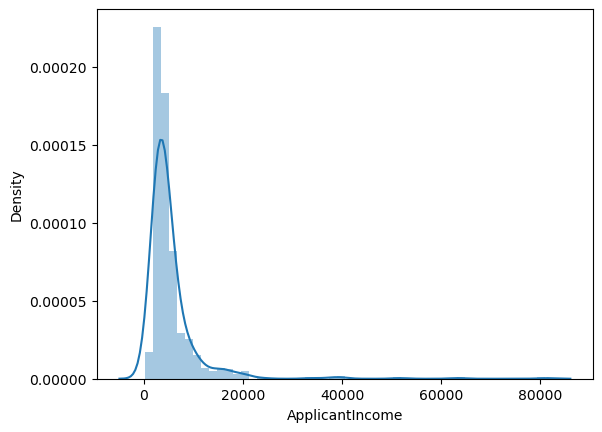

In [176]:
sns.distplot(df['ApplicantIncome'])

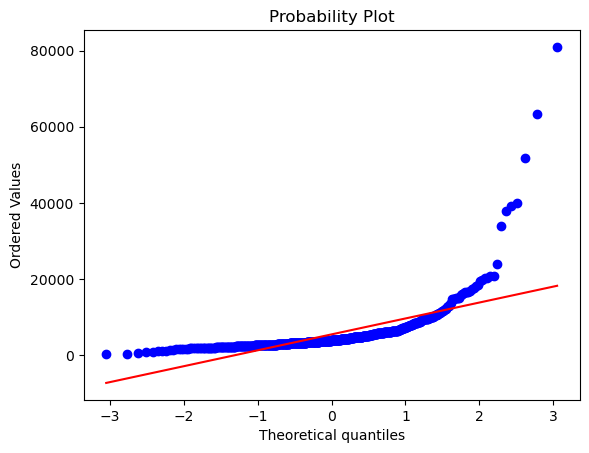

In [177]:
stats.probplot(df['ApplicantIncome'],dist='norm',plot=plt)
plt.show()

In [178]:
ts,p_value=kstest(df['ApplicantIncome'],'norm')
if p_value>0.05:
    print('H0 is acceptd')
else:
    print('H0 is rejected')

H0 is rejected


In [179]:
result=anderson(df['ApplicantIncome'])
result

AndersonResult(statistic=np.float64(80.18920498393993), critical_values=array([0.572, 0.652, 0.782, 0.912, 1.085]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(5403.459283387622), scale=np.float64(6109.041673387174))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [180]:
from scipy.stats import shapiro
ts,p_value=shapiro(df['ApplicantIncome'])
if p_value>0.05:
    print('H0 is accepted')
else:
    print('H0 is rejectd')

H0 is rejectd


In [181]:
def cdf(data):
    sort=np.sort(data)
    cdf=np.arange(1,len(sort)+1)/len(sort)
    return cdf

In [182]:
data=df['ApplicantIncome']
a=cdf(data)
s=np.sort(data)

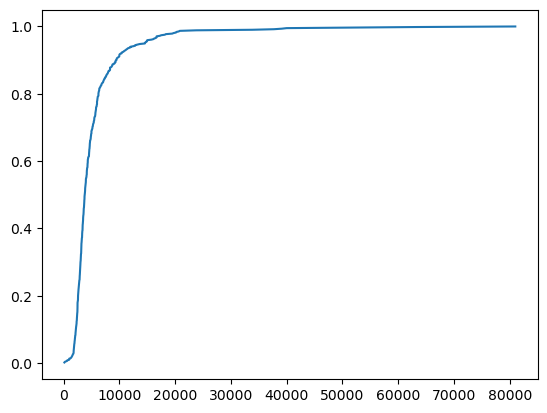

In [183]:
plt.plot(s,a)
plt.show()

In [184]:
def out(data):
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    return lower,upper
data=df['ApplicantIncome']
out(data)

(np.float64(-1498.75), np.float64(10171.25))

In [185]:
def outlier_using_quantile(data):
    LL=np.quantile(data,0.01)
    UL=np.quantile(data,0.99)
    return LL,UL
data=df['ApplicantIncome']
LL,UL=outlier_using_quantile(data)

In [186]:
df=df[(df['ApplicantIncome']>=LL)&(df['ApplicantIncome']<=UL)]

<Axes: ylabel='ApplicantIncome'>

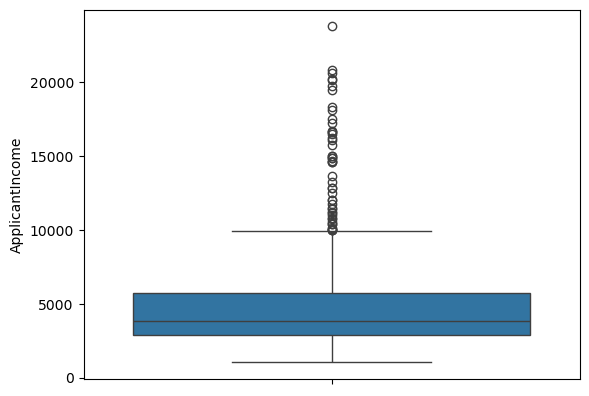

In [187]:
sns.boxplot(df['ApplicantIncome'])

In [188]:
def fun(data):
    mean=np.mean(data)
    sd=np.std(data)
    lower=mean-2.4*sd
    upper=mean+2.4*sd
    return lower,upper
data=df['ApplicantIncome']
LL,UL=fun(data)

In [189]:
df=df[(df['ApplicantIncome']>=LL)&(df['ApplicantIncome']<=UL)]

<Axes: ylabel='ApplicantIncome'>

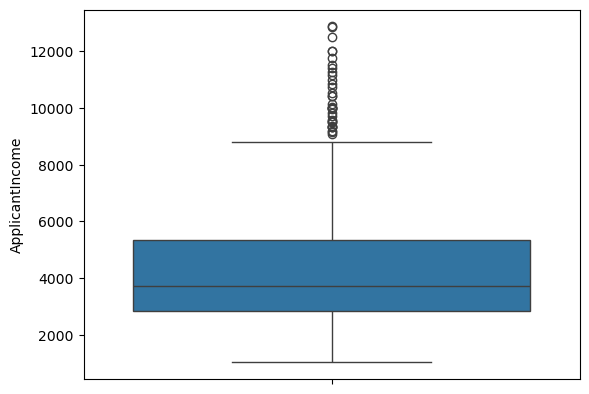

In [190]:
sns.boxplot(df['ApplicantIncome'])
#Here we observe ouliers was deleted

In [191]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])

In [192]:
df['ApplicantIncome']

0      8.674026
1      8.430109
2      8.006368
3      7.856707
4      8.699515
         ...   
609    7.972466
610    8.320205
611    8.996157
612    8.933664
613    8.430109
Name: ApplicantIncome, Length: 574, dtype: float64

In [193]:
t,l=boxcox(df['ApplicantIncome'])

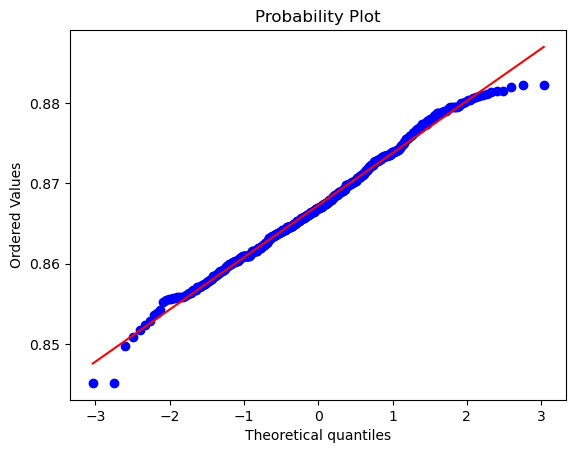

In [194]:
stats.probplot(t,dist='norm',plot=plt)
plt.show()

<Axes: >

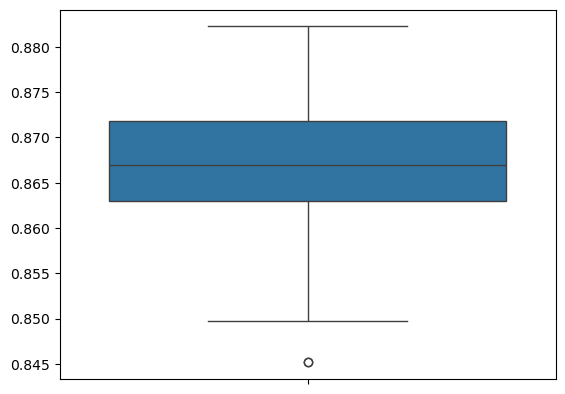

In [195]:
sns.boxplot(t)

In [196]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [197]:
df['CoapplicantIncome'].value_counts()

CoapplicantIncome
0.0       245
1666.0      5
2083.0      5
2500.0      5
5625.0      3
         ... 
1508.0      1
2358.0      1
2118.0      1
4196.0      1
1086.0      1
Name: count, Length: 279, dtype: int64

In [198]:
6.63000000e+02+4.30100000e+03

4964.0

In [199]:
df.isnull().sum()

Gender                9
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     14
Credit_History       47
Property_Area         0
Loan_Status           0
dtype: int64

In [200]:
df.ndim

2

In [201]:
df.shape

(574, 12)

C:\Users\HP\AppData\Local\Temp\ipykernel_14880\2149142820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

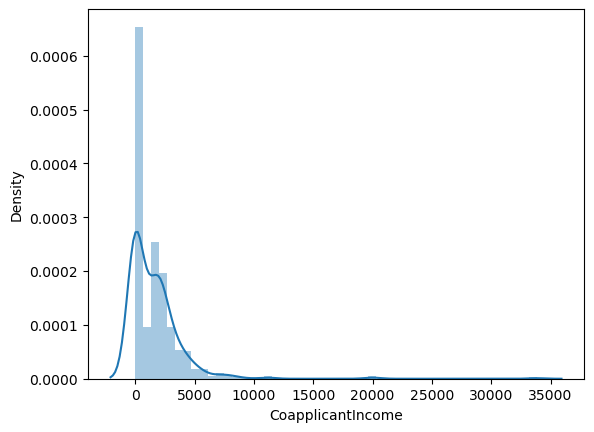

In [202]:
sns.distplot(df['CoapplicantIncome'])

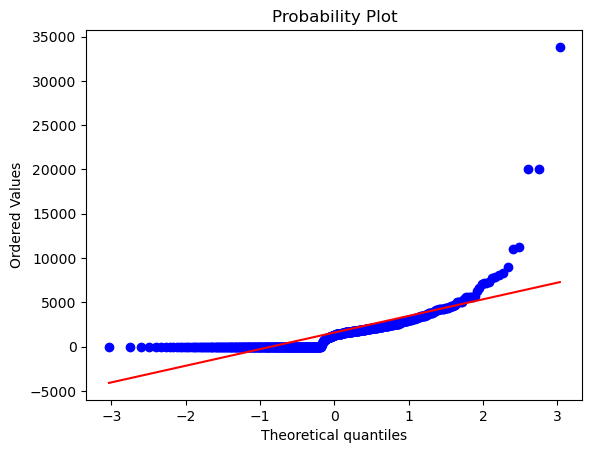

In [203]:
#QQ_plot
stats.probplot(df['CoapplicantIncome'],dist='norm',plot=plt)
plt.show()

In [204]:
#KS_test
TS,P=kstest(df['CoapplicantIncome'],'norm')
P>0.05
#H0 is rejected

np.False_

In [205]:
#AD_test
result=anderson(df['CoapplicantIncome'])
#43.51<0.782
TS=result.statistic
critical=result.critical_values[2]
if TS<critical:
    print('H0 is accepted')
else:
    print('H0 is rejected')

H0 is rejected


In [206]:
#SHAPIRO_test
TS,p_value=shapiro(df['CoapplicantIncome'])
if p_value<0.05:
    print("H0 is rejected")
else:
    print("fail to reject H0")

H0 is rejected


In [207]:
#BY seeing thost tests this data doesnt follow the gaussian distribution 

In [208]:
#find whether is has outliers or not

<Axes: ylabel='CoapplicantIncome'>

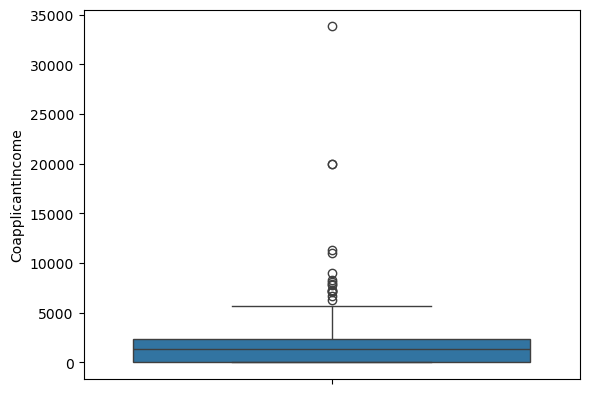

In [209]:
sns.boxplot(df['CoapplicantIncome'])

In [210]:
def outlier(data):
    q1=np.quantile(data,0.25)
    q3=np.quantile(data,0.75)
    iqr=q3-q1
    ll=max(0,q1-1.5*iqr)
    ul=q3+6*iqr
    return ll,ul
data=df['CoapplicantIncome']
LL,UL=outlier(data)

In [211]:
df=df[(df['CoapplicantIncome']>=LL)&(df['CoapplicantIncome']<=UL)]

<Axes: ylabel='CoapplicantIncome'>

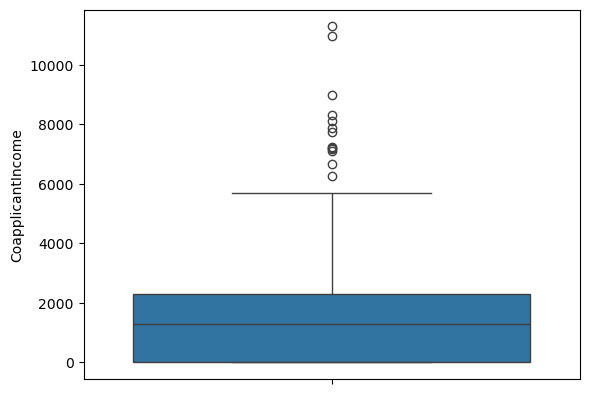

In [212]:
sns.boxplot(df['CoapplicantIncome'])
#BY observing this plot maximum ouliers was deleted.

In [213]:
df['CoapplicantIncome'].skew()

np.float64(1.686419223256897)

C:\Users\HP\AppData\Local\Temp\ipykernel_14880\2149142820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

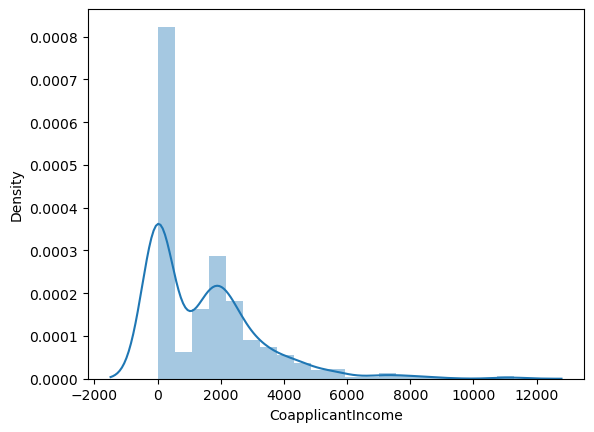

In [214]:
sns.distplot(df['CoapplicantIncome'])

In [215]:
def bootstrap(data,sample_size,no_samples):
    boot=[]
    for i in range(no_samples):
        get_sample=np.random.choice(data,sample_size)
        boot.append(np.median(get_sample))
    return boot
data=df['CoapplicantIncome']
boot=bootstrap(data,30,1000)

In [216]:
lower=np.percentile(boot,2.5)
upper=np.percentile(boot,97.5)

In [217]:
lower,upper

(np.float64(0.0), np.float64(1975.5874999999999))

In [218]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [219]:
def CLT(data,sample_size,no_sample):
    sample_means=[]
    for i in range(no_sample):
        get_sample=np.random.choice(data,sample_size)
        sample_means.append(np.mean(get_sample))
    return np.mean(sample_means)
data=df['CoapplicantIncome']
CLT(data,30,1000)

np.float64(1479.9379546486027)

In [220]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 154.,  85.,
       259., 194.,  93., 182., 102., 290.,  84., 129., 185.,  30., 244.,
       255.,  98., 275., 121.,  63.,  87., 101., 495.,  67.,  73., 108.,
        58.,  48., 164., 170.,  83.,  90., 166., 124.,  55.,  59., 127.,
       214., 240.,  72.,  60., 138.,  42., 280., 140., 155., 123., 279.,
       330., 150., 207.,  78.,  54.,  89., 143., 105., 132.,  56., 159.,
       376., 117.,  71., 173.,  46., 228., 308., 236., 380., 296., 156.,
       103.,  45.,  65.,  53.,  62., 218., 178., 40

In [221]:
df.isnull().sum()

Gender                9
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     14
Credit_History       47
Property_Area         0
Loan_Status           0
dtype: int64

In [222]:
df['LoanAmount'].value_counts()

LoanAmount
120.0    19
110.0    15
100.0    15
187.0    12
160.0    12
         ..
142.0     1
192.0     1
496.0     1
40.0      1
253.0     1
Name: count, Length: 187, dtype: int64

<Axes: ylabel='LoanAmount'>

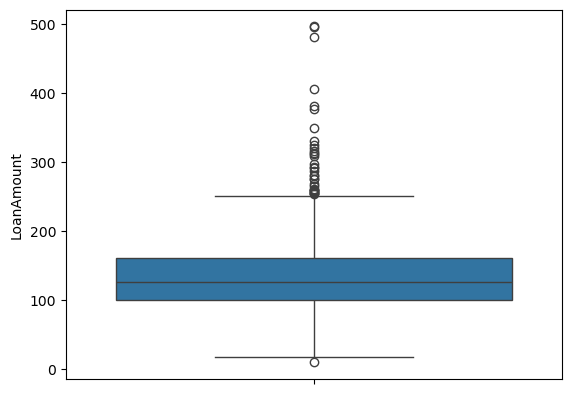

In [223]:
sns.boxplot(df['LoanAmount'])

In [224]:
def out(data):
    mean=np.mean(data)
    sd=np.std(data)
    lower=max(0,mean-3*sd)
    upper=mean+3*sd
    return lower,upper
data=df['LoanAmount']
LL,UL=out(data)

In [225]:
LL,UL

(0, np.float64(326.97386265566934))

In [226]:
#df=df[(df['LoanAmount']>=LL)&(df['LoanAmount']<=UL)]
df['LoanAmount']=df['LoanAmount'].clip(lower=0,upper=UL)

<Axes: ylabel='LoanAmount'>

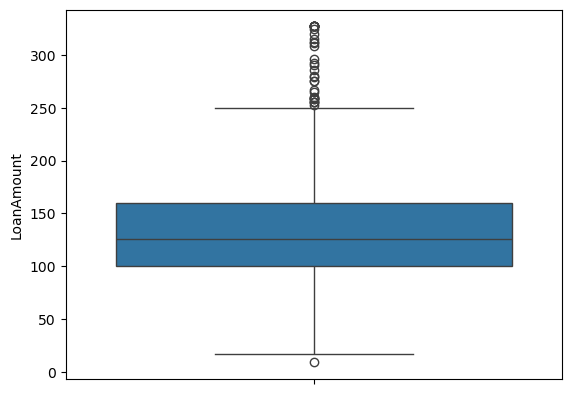

In [227]:
sns.boxplot(df['LoanAmount'])

In [228]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(360.0)

In [229]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [230]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    490
180.0     40
480.0     13
300.0     12
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_14880\710718432.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

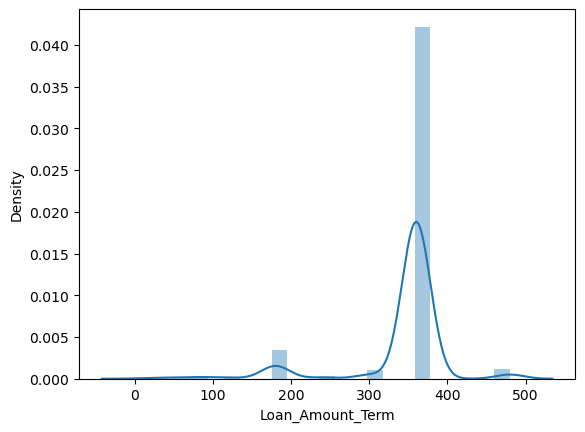

In [231]:
sns.distplot(df['Loan_Amount_Term'])

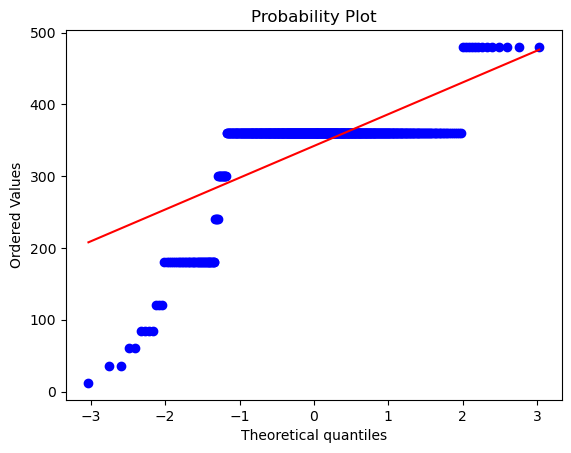

In [232]:
stats.probplot(df['Loan_Amount_Term'],dist='norm',plot=plt)
plt.show()

In [233]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             562 non-null    float64
 1   Married            571 non-null    int64  
 2   Dependents         571 non-null    object 
 3   Education          571 non-null    int64  
 4   Self_Employed      571 non-null    int64  
 5   ApplicantIncome    571 non-null    float64
 6   CoapplicantIncome  571 non-null    float64
 7   LoanAmount         551 non-null    float64
 8   Loan_Amount_Term   571 non-null    float64
 9   Credit_History     524 non-null    float64
 10  Property_Area      571 non-null    object 
 11  Loan_Status        571 non-null    object 
dtypes: float64(6), int64(3), object(3)
memory usage: 58.0+ KB


In [235]:
df['Credit_History']=df['Credit_History'].fillna(1.0)

In [236]:
df['Credit_History']=df['Credit_History'].astype('object')

<Axes: xlabel='Credit_History'>

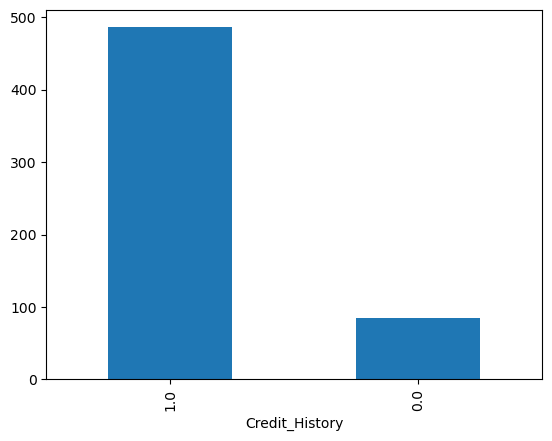

In [237]:
df['Credit_History'].value_counts().plot(kind='bar')

C:\Users\HP\AppData\Local\Temp\ipykernel_14880\4144326787.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit_History'])


<Axes: xlabel='Credit_History', ylabel='Density'>

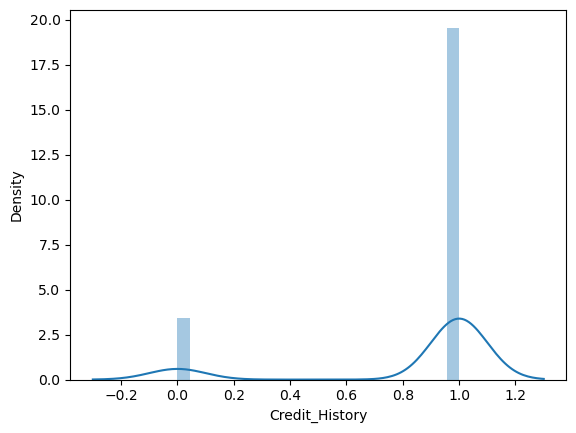

In [238]:
sns.distplot(df['Credit_History'])

In [239]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [240]:
def fun(x):
    if x=='Urban':
        return 0
    elif x=='Rural':
        return 1
    else:
        return 2

In [241]:
df['Property_Area']=df['Property_Area'].apply(fun)

<Axes: xlabel='Property_Area'>

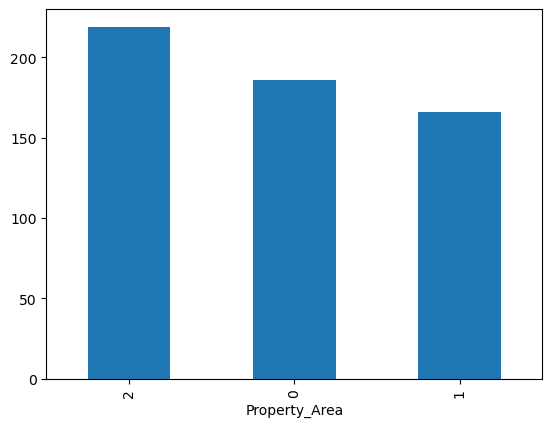

In [242]:
df['Property_Area'].value_counts().plot(kind='bar')

# Bivariate_Analysis

In [243]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [244]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [245]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0,0,1,0,8.674026,0.0,NaN,360.0,1.0,0,Y
1,1.0,1,1,1,0,8.430109,1508.0,128.0,360.0,1.0,1,N
2,1.0,1,0,1,1,8.006368,0.0,66.0,360.0,1.0,0,Y
3,1.0,1,0,0,0,7.856707,2358.0,120.0,360.0,1.0,0,Y
4,1.0,0,0,1,0,8.699515,0.0,141.0,360.0,1.0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0,0,1,0,7.972466,0.0,71.0,360.0,1.0,1,Y
610,1.0,1,3,1,0,8.320205,0.0,40.0,180.0,1.0,1,Y
611,1.0,1,1,1,0,8.996157,240.0,253.0,360.0,1.0,0,Y
612,1.0,1,2,1,0,8.933664,0.0,187.0,360.0,1.0,0,Y


In [246]:
df1=df[['Gender','Loan_Status']]
df1

,Gender,Loan_Status
0,1.0,Y
1,1.0,N
2,1.0,Y
3,1.0,Y
4,1.0,Y
...,...,...
609,0.0,Y
610,1.0,Y
611,1.0,Y
612,1.0,Y


In [247]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0,0,1,0,8.674026,0.0,NaN,360.0,1.0,0,Y
1,1.0,1,1,1,0,8.430109,1508.0,128.0,360.0,1.0,1,N
2,1.0,1,0,1,1,8.006368,0.0,66.0,360.0,1.0,0,Y
3,1.0,1,0,0,0,7.856707,2358.0,120.0,360.0,1.0,0,Y
4,1.0,0,0,1,0,8.699515,0.0,141.0,360.0,1.0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0,0,1,0,7.972466,0.0,71.0,360.0,1.0,1,Y
610,1.0,1,3,1,0,8.320205,0.0,40.0,180.0,1.0,1,Y
611,1.0,1,1,1,0,8.996157,240.0,253.0,360.0,1.0,0,Y
612,1.0,1,2,1,0,8.933664,0.0,187.0,360.0,1.0,0,Y


In [248]:
table=pd.crosstab(df1['Gender'],df1['Loan_Status'])
table

Loan_Status,N,Y
Gender,,
0.0,36,67
1.0,137,322


In [250]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0,0,1,0,8.674026,0.0,NaN,360.0,1.0,0,Y
1,1.0,1,1,1,0,8.430109,1508.0,128.0,360.0,1.0,1,N
2,1.0,1,0,1,1,8.006368,0.0,66.0,360.0,1.0,0,Y
3,1.0,1,0,0,0,7.856707,2358.0,120.0,360.0,1.0,0,Y
4,1.0,0,0,1,0,8.699515,0.0,141.0,360.0,1.0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0,0,1,0,7.972466,0.0,71.0,360.0,1.0,1,Y
610,1.0,1,3,1,0,8.320205,0.0,40.0,180.0,1.0,1,Y
611,1.0,1,1,1,0,8.996157,240.0,253.0,360.0,1.0,0,Y
612,1.0,1,2,1,0,8.933664,0.0,187.0,360.0,1.0,0,Y


In [251]:
from scipy.stats import chi2_contingency
table=pd.crosstab(df1['Gender'],df1['Loan_Status'])
chi2,p_value,df,exp=chi2_contingency(table)
p_value

np.float64(0.3702257216900948)

In [252]:
from scipy.stats import chi2_contingency
table=pd.crosstab(df1['Gender'],df1['Loan_Status'])
chi2,p_value,dof,exp=chi2_contingency(table)
if p_value>0.05:
    print("Fail to reject H0 variable are independent ,There is no statastical significant difference between Gende and Loan_Amount")
else:
    print('H0 is rejected ,Variables are dependent')

Fail to reject H0 variable are independent ,There is no statastical significant difference between Gende and Loan_Amount


<Axes: xlabel='Gender'>

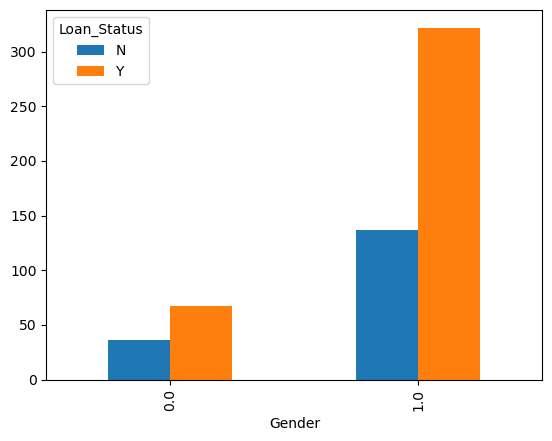

In [253]:
table.plot(kind='bar')

In [254]:
df11

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [255]:
df11.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [256]:
df['Married'].unique()

TypeError: 'int' object is not subscriptable

In [357]:
#i need to check Married column to target to column my target column is Loan_Status

In [358]:
df1=df[['Married','Loan_Status']]
df1

,Married,Loan_Status
0,0,Y
1,1,N
2,1,Y
3,1,Y
4,0,Y
...,...,...
609,0,Y
610,1,Y
611,1,Y
612,1,Y


In [360]:
observe=pd.crosstab(df1['Married'],df1['Loan_Status'])
observe

Loan_Status,N,Y
Married,,
0,74,126
1,104,267


In [362]:
#CHIsuare test

chi2,p_value,dof,expected=chi2_contingency(table)
if p_value>0.05:
    print('fail to reject H0,there is no statastical significant difference between married and loan_satatus')
else:
    print('H0 is rejected,there is statastical relationship between married and loan_status')

fail to reject H0,there is no statastical significant difference between married and loan_satatus


<Axes: xlabel='Married'>

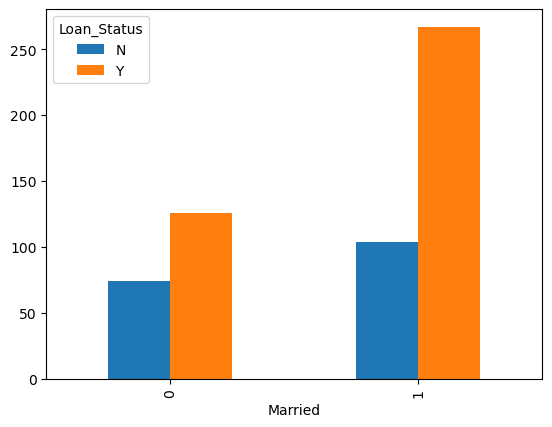

In [368]:
observe.plot(kind='bar')

In [119]:
df=df11.copy()

In [120]:
df['Dependents'].unique()

array([0, 1, 2, '3+', nan], dtype=object)

In [121]:
df1=df[['Dependents','Loan_Status']]
observe_matrix=pd.crosstab(df1['Dependents'],df1['Loan_Status'])
observe_matrix

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


In [122]:
#chi_square test
chi2,p_value,dof,expected=chi2_contingency(table)
if p_value>0.05:
    print('fail to reject H0,there is no statastical significant relationship between Dependents and loan_satatus')
else:
    print('H0 is rejected,there is statastical relationship between Dependents and loan_status')

fail to reject H0,there is no statastical significant relationship between Dependents and loan_satatus


In [123]:
qwe=df[(df['Loan_Status']=='Y')&(df['ApplicantIncome'])]
qwe

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y


In [124]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [125]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [126]:
df11['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

<Axes: xlabel='Education'>

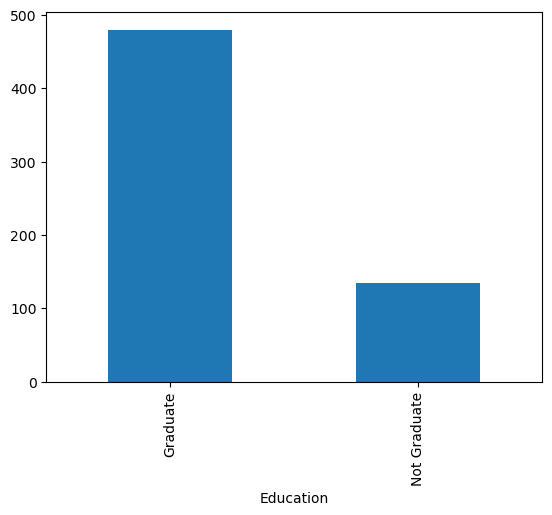

In [127]:
df['Education'].value_counts().plot(kind='bar')

In [128]:
#these are two categorical columns such that i use chi_square
df1=df[['Education','Loan_Status']]
observe=pd.crosstab(df['Education'],df['Loan_Status'])
chi2,p_value,dof,exp=chi2_contingency(observe)
if p_value>0.05:
    print('fail to reject H0,their is no statastical significant relationship between education and loan_status')
else:
    print('H0 is rejected their is statastical relationship between education and loan_status')

H0 is rejected their is statastical relationship between education and loan_status


<Axes: xlabel='Education'>

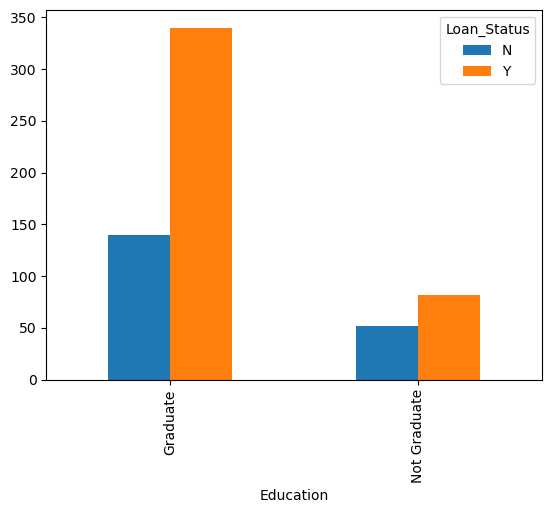

In [129]:
#Education  column is important feature it can help to predict loan_status,It should be included in the model
observe.plot(kind='bar')

In [130]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [131]:
#these are categorical columns use chi_square
df1=df[['Self_Employed','Loan_Status']]
observe=pd.crosstab(df1['Self_Employed'],df1['Loan_Status'])
chi2,p_value,dof,exp=chi2_contingency(observe)
if p_value>0.05:
    print('Fail to reject H0, their is no statastical relationship between Self_Employed and Loan_status')
else:
    print('H0 is rejected, their is a statastical relation ship between self_employed and Loan_status')

Fail to reject H0, their is no statastical relationship between Self_Employed and Loan_status


<Axes: xlabel='Self_Employed'>

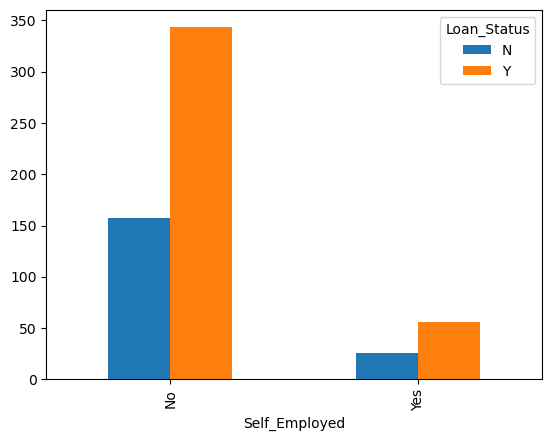

In [132]:
#self_employed column is not usefull to predict loan status ,thats why we are not taking this column in feature selection
observe.plot(kind='bar')

In [133]:
#next column this column is numerical column thats why we use t_test
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [134]:
#next column this column is numerical column thats why we use t_test
df['ApplicantIncome'].unique()
from scipy.stats import ttest_ind
approve=df[df['Loan_Status']=='Y']['ApplicantIncome']
not_approve=df[df['Loan_Status']=='N']['ApplicantIncome']
test_statastics,p_value=ttest_ind(approve,not_approve,equal_var=False)
if p_value>0.05:
    print("Fail to reject H0 ,their is no statastical significant mean difference between loan_status and ApplicantIncome")
else:
    print('H0 is rejected , their is a statastical relationship between loan_status and ApplicantIncome')

Fail to reject H0 ,their is no statastical significant mean difference between loan_status and ApplicantIncome


<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

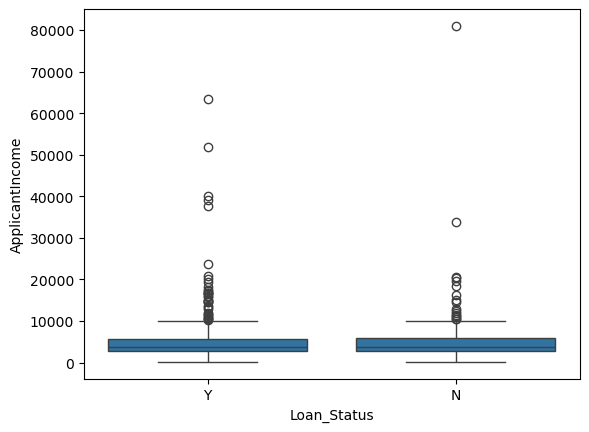

In [135]:
# application column is not usefull for loan_status,we cannot take this column
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df)

In [136]:
#new column this is numerical column thats why i use t_test
approve=df[df['Loan_Status']=='Y']['CoapplicantIncome']
not_approve=df[df['Loan_Status']=='N']['CoapplicantIncome']
test_statastics,p_value=ttest_ind(approve,not_approve,equal_var=False)
if p_value>0.05:
    print("Fail to reject H0 ,their is no statastical significant mean difference between loan_status and CoapplicantIncome")
else:
    print('H0 is rejected , their is a statastical relationship between loan_status and CoapplicantIncome')

Fail to reject H0 ,their is no statastical significant mean difference between loan_status and CoapplicantIncome


<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

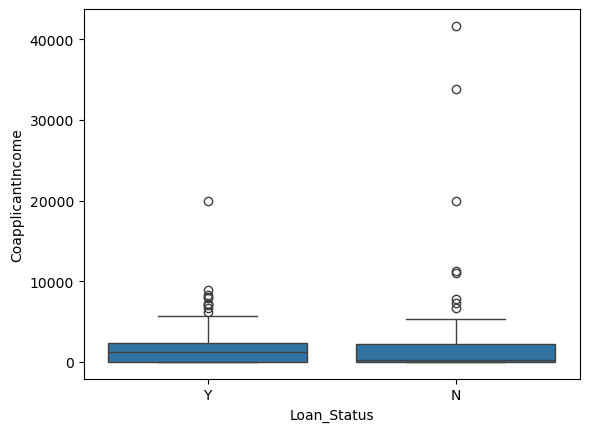

In [137]:
#coapplicant_income column is not usefull for loan_status,we cannot take this column
sns.boxplot(x='Loan_Status',y="CoapplicantIncome",data=df)

In [138]:
#new column this is numerical column i use t_test
approve=df[df['Loan_Status']=='Y']['LoanAmount']
not_approve=df[df['Loan_Status']=='N']['LoanAmount']
test_statastics,p_value=ttest_ind(approve,not_approve,equal_var=False)
if p_value>0.05:
    print("Fail to reject H0 ,their is no statastical significant mean difference between loan_status and LoanAmount")
else:
    print('H0 is rejected , their is a statastical relationship between loan_status and LoanAmount')

H0 is rejected , their is a statastical relationship between loan_status and LoanAmount


<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

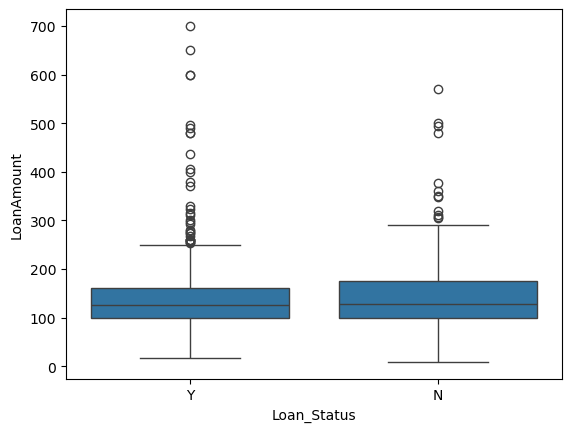

In [139]:
#loanamount column is not usefull for loan_status,we cannot take this column
sns.boxplot(x='Loan_Status',y='LoanAmount',data=df)

In [140]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [141]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [142]:
df1=df[['Loan_Amount_Term','Loan_Status']]
obj=pd.crosstab(df1['Loan_Status'],df1['Loan_Amount_Term'])
chi2,p_value,dof,exp=chi2_contingency(obj)
if p_value>0.05:
    print('Fail to reject H0,their is no statastical significant relationship between loan_amount_term and Loan_Status')
else:
    print('H0 is rejected ,their is a statastical relationship between loan_amount_term and loan_status')

Fail to reject H0,their is no statastical significant relationship between loan_amount_term and Loan_Status


<Axes: xlabel='Loan_Status'>

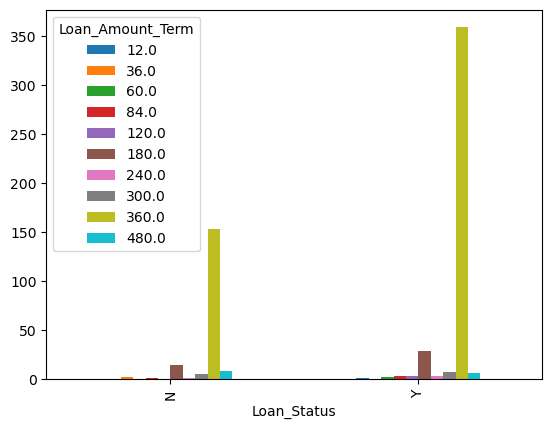

In [143]:
obj.plot(kind='bar')